# Task 2

# Objective: Data Cleaning and Exploratory Data Analysis on a data set

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('salesorig.csv')
df.head()

,Order ID,Product ID,Product Category,Quantity,Unit Price,Total Price,Order Date,Customer ID,Payment Type,Order Status
0,873ff350-854d-4bd8-aebf-6cc5e1a6d3b7,26ab320e-62f2-4203-be68-f8740085d796,Sports & Outdoors,4,154.050509,616.202036,2023-08-02,292fe8cf-4d60-437b-8488-4c225e84d48d,Credit Card,Completed
1,7cb2641e-ea6b-4faf-a7ab-24992d5573fa,8c0d7ba9-1e6b-412a-8359-97d964ad19e5,Home & Kitchen,5,275.539908,1377.699538,2023-09-03,a026178d-e3ed-4d45-a49c-8336479b2114,PayPal,Refunded
2,94e0de8a-419d-46e1-9e7c-65c730b89c65,5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3,Beauty & Health,3,56.410098,169.230294,2023-12-06,808e8010-1552-42dd-a9c5-eacd4fde3283,Debit Card,Cancelled
3,88cc8ccf-f018-46ac-ba3b-f36b5cf4e429,b3f6c6a5-d3cb-49a4-b53b-3996be815c28,Books,2,176.410906,352.821812,2023-07-22,6184896b-4fb2-4ae0-9851-65033dae1319,PayPal,Pending
4,eb520575-720e-456e-9dc5-c2c3bb887bfc,fed52dbf-49c6-4128-8b18-c36e50184a04,Electronics,3,409.892144,1229.676431,2023-04-08,24689017-68fc-42ba-8ae6-f0ad7155e0d6,Credit Card,Cancelled


Collecting information about the data to check whether there exists any null values, the data types of each column etc.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          10000 non-null  object 
 1   Product ID        10000 non-null  object 
 2   Product Category  10000 non-null  object 
 3   Quantity          10000 non-null  int64  
 4   Unit Price        10000 non-null  float64
 5   Total Price       10000 non-null  float64
 6   Order Date        10000 non-null  object 
 7   Customer ID       10000 non-null  object 
 8   Payment Type      10000 non-null  object 
 9   Order Status      10000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


In [146]:
data=df

In [147]:
#Checking for null values

print(data.isnull().sum())
data = data.dropna()
data = data.drop_duplicates()
data['Order Date'] = pd.to_datetime(data['Order Date'])

Order ID            0
Product ID          0
Product Category    0
Quantity            0
Unit Price          0
Total Price         0
Order Date          0
Customer ID         0
Payment Type        0
Order Status        0
dtype: int64


Summary Statistics

In [148]:
print(data.describe())

           Quantity    Unit Price   Total Price                     Order Date
count  10000.000000  10000.000000  10000.000000                          10000
mean       3.009700    253.278078    762.724197  2023-06-30 22:23:48.480000256
min        1.000000     10.071462     10.092483            2023-01-01 00:00:00
25%        2.000000    129.205590    284.388946            2023-03-31 00:00:00
50%        3.000000    251.669090    602.823424            2023-07-01 00:00:00
75%        4.000000    378.259451   1129.878504            2023-09-30 00:00:00
max        5.000000    499.956975   2499.784873            2023-12-31 00:00:00
std        1.399286    142.523046    593.515659                            NaN


Univariate Analysis

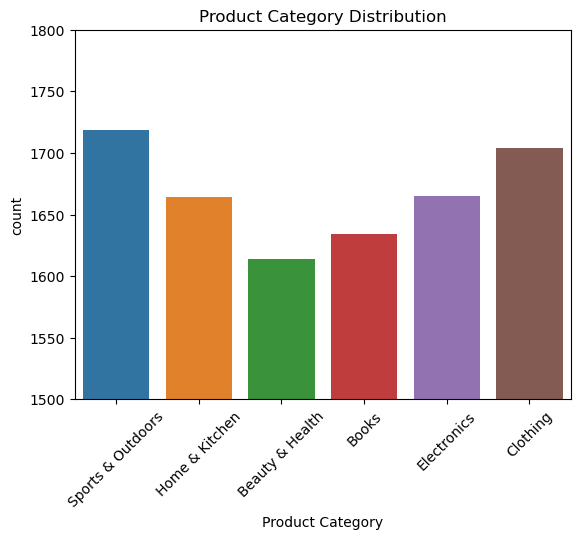

In [149]:
sns.countplot(x='Product Category', data=data)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.ylim(1500,1800)
plt.show()

From the above plot, we can see that the most number of products ordered are from the Sports and outdoors category, followed by Clothing.
The least amount of products bought are from the beauty and health category.

Univariate Analysis using Histogram

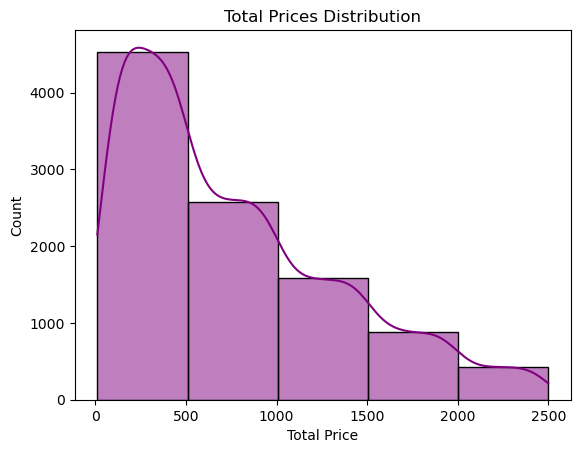

In [156]:
sns.histplot(data['Total Price'], bins=5, kde=True, color='purple')
plt.title('Total Prices Distribution')
plt.xlabel('Total Price')
plt.ylabel('Count')
plt.show()

The above histogram depicts that the most number of orders have a total price below Rs 500.

Bivariate Analysis

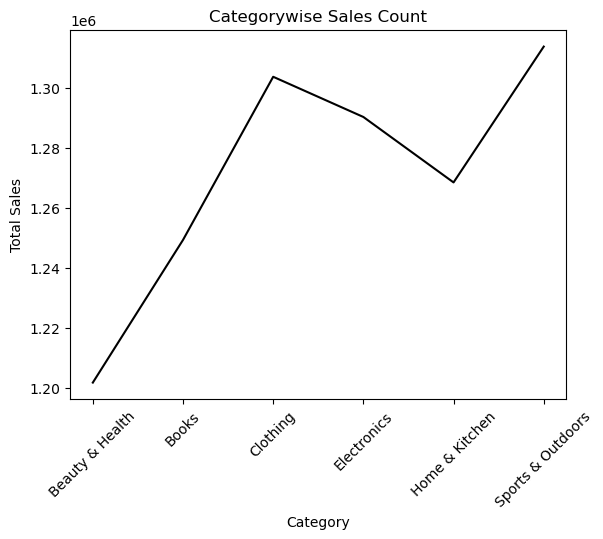

In [153]:
category_sales = data.groupby('Product Category')['Total Price'].sum()
plt.plot(category_sales, color='black')
plt.title('Categorywise Sales Count')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

The above line plot visualizes the total sales in each category, with Sports and outdoors seeing the most sales with more than Rs 13,00,000.